In [2]:
import numpy as np

# Training data
from tqdm import trange

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



In [48]:
## Linear layer
class Relu:
    def __init__(self):
        self.derivative = None

    def apply(self, x):
        self.derivative = (x > 0).astype(np.float32)
        return np.maximum(x, 0)
    
class Layer:
    def __init__(self, d_in, d_out, is_activated):
        self.inn = None
        self.a = None

        self.weights = np.random.random((d_out, d_in))
        self.delta = None
        
        self.activation = None
        if is_activated:
            self.activation = Relu() 
  
    def forward(self, x):
        self.inn = np.matmul(self.weights, x)
        
        # Apply activation function
        if self.activation:
            self.a = self.activation.apply(self.inn)
        else:
            self.a = self.inn
        return self.a 


## Neural network

class TwoLayerNet:
    def __init__(self, d_in, hidden, d_out):
        self.head = Layer(d_in, hidden, is_activated=True)
        self.linear = Layer(hidden, hidden, is_activated=True)
        self.tail = Layer(hidden, d_out, is_activated=False) 

    def forward(self, x):
        imm = self.head.forward(x)
        imm = self.linear.forward(imm)
        return self.tail.forward(imm)
          


In [49]:
net = TwoLayerNet(2, 32, 1)

# Training data

In [50]:
class Data:
    def __init__(self, x, y):
        self.X = x
        self.y = y

In [51]:
# z = x^2 + y^2
n_samples = 2000
X = np.random.random((n_samples, 2))
y = (X[:,0]**2 + X [:,1]**2).reshape(-1,1)
train = Data(X, y)

learning_rate = 3e-5
for i in trange(15000):
    y_pred = net.forward(train.X.T)
    
    # Backpropagation 
    # At the output layer
    grad_out = (train.y.T - y_pred)/n_samples

    # Chain rule: calculate the gradient of the loss with respect to the weights
    net.tail.data = net.linear.activation.derivative*(net.tail.weights.T @ grad_out)
    net.linear.data = net.head.activation.derivative*(net.linear.weights.T @ net.tail.data)
    net.head.data = (net.head.weights.T @ net.linear.data) # d(intput)/input = 1

    net.tail.weights += learning_rate * (grad_out @ net.linear.a.T)
    net.linear.weights += learning_rate * (net.tail.data @ net.head.a.T)
    net.head.weights += learning_rate * (net.linear.data @ train.X)


100%|██████████| 15000/15000 [00:30<00:00, 494.04it/s]


In [53]:
print('Train RMSE:', np.mean((train.y.T - y_pred)**2))

Train RMSE: 0.039070342402136936


In [54]:
n_samples = 100
X = np.random.random((n_samples, 2))
y = (X[:,0]**2 + X [:,1]**2).reshape(-1,1)
test = Data(X, y)

In [55]:
y_test = net.forward(test.X.T)
print('Test RMSE:', np.mean((test.y.T - y_test)**2))

Test RMSE: 0.03605379039948581


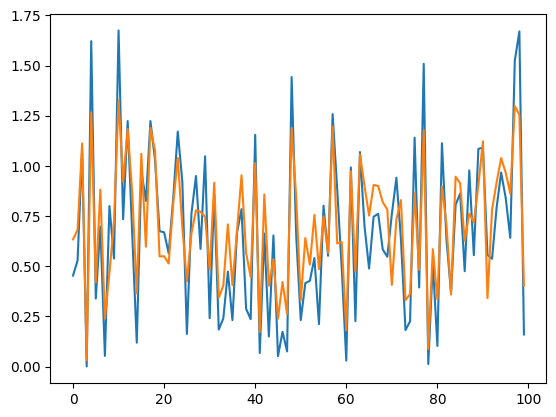

In [56]:
plt.plot(np.squeeze(test.y.T))
plt.plot(np.squeeze(y_test))